In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [15]:
#Loading csv file as df
filename = "data/water quality data Dunea.csv"
df = pd.read_csv(
    filename, skipinitialspace=True, index_col=[1], parse_dates=True, dayfirst = True
)

#Translating all Dutch terms
df.index.name = "Time"
df = df.rename(columns={'Monstercode': 'Location', 'Eenheid': 'Unit', 'Waarde': 'Value', "Rapport waarde":"Reported value"})
df['Component'] = df['Component'].replace(['Zuurgraad'], 'Acidity')
df['Component'] = df['Component'].replace(['Temperatuur'], 'Temperature')

# Splitting up data into different components
# Components cannot be placed as columns since the times of measurement and locations differ
df_iopromide = df[df["Component"] == "iopromide"]
df_MTBE = df[df["Component"] == "methyl-tertiair-butylether (MTBE)"] 
df_Chloride = df[df["Component"] == "Chloride"]
df_fluopyram = df[df["Component"] == "fluopyram"]
df_Temp = df[df["Component"] == "Temperature"]
df_diclofenac = df[df["Component"] == "diclofenac"]
df_sucralose = df[df["Component"] == "sucralose"]
df_ph = df[df["Component"] == "Acidity"]
datasets = [df_iopromide, df_MTBE, df_Chloride, df_fluopyram, df_Temp, df_diclofenac, df_sucralose, df_ph]
threshold = [1000, 1, 150, 0.1, 25, 1000, 1, (7, 9.5)]
# iop, fluop, diclo, sucralose: file:///C:/Users/Jip/Downloads/Waterkwaliteitsrapportage-Scheveningen-1ekw2023-wettelijk.pdf
# MTBE, chloride, ph, temp: https://wetten.overheid.nl/BWBR0030111/2024-01-01


In [53]:
def func_threshold(datasets, threshold):
    exceeded_count = []
    for i, dataset in enumerate(datasets):
        if type(threshold[i]) != tuple:
            data_value_crossed = dataset[dataset['Value'] > threshold[i]]['Value']
        else:
            lower_threshold = threshold[i][0]
            upper_threshold = threshold[i][1]
            data_value_crossed = dataset[(lower_threshold > dataset['Value']) & (dataset['Value'] > upper_threshold)]['Value']
            
        exceeded_count.append(data_value_crossed.groupby(data_value_crossed.index.year).count())
        
    return exceeded_count
exceeded_count = func_threshold(datasets, threshold)

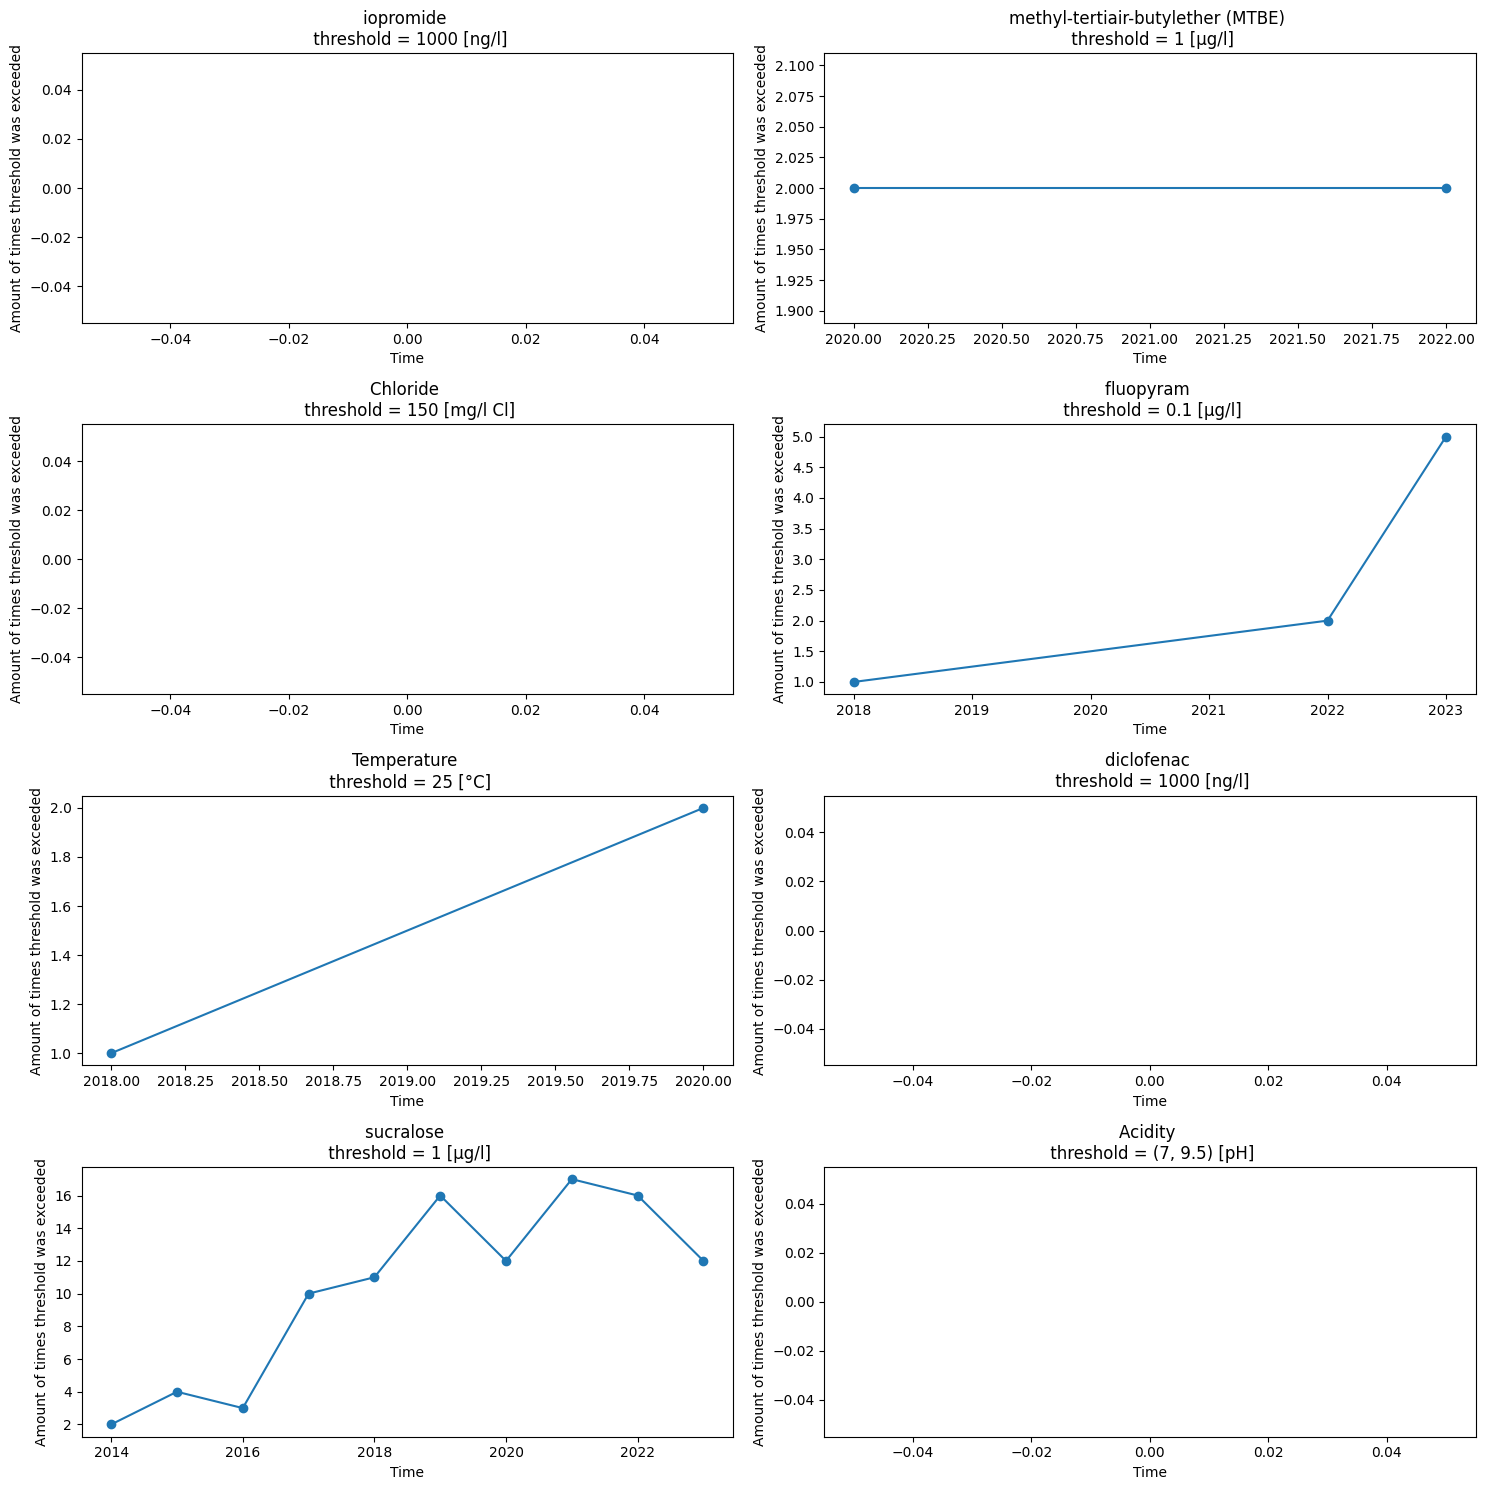

In [72]:
def plotter(exceeded):
    plt.figure(figsize=(15,15))
    for i, count in enumerate(exceeded):
        ax = plt.subplot(4, 2, i + 1)
        plt.title(f'{datasets[i].iloc[0,1]} \n threshold = {threshold[i]} [{datasets[i].iloc[0,2]}]')
        count.plot(ax = ax, marker='o')
        plt.ylabel('Amount of times threshold was exceeded')
    plt.tight_layout()
    
plotter(exceeded_count)